In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('spotify.csv')

In [9]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


# Q.1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful ?

In [11]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [21]:
duplicates = df.duplicated().sum()
print(f"\nFound {duplicates} duplicate rows")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])
    
    # Remove duplicates (keep first occurrence)
    df_final = df.drop_duplicates(keep='first')
    print(f"\nRemoved {duplicates} duplicates. Final shape: {df_final.shape}")
else:
    print("\nNo duplicate rows found")
    df_final = df.copy()


Found 27 duplicate rows

Duplicate rows:
              Artist                                         Track Name  \
3              Drake               First Person Shooter (feat. J. Cole)   
4              Drake                      Jimmy Cooks (feat. 21 Savage)   
7       Travis Scott                             MELTDOWN (feat. Drake)   
9              Drake                                          Rich Flex   
10       Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
22       Nicki Minaj                     Everybody (feat. Lil Uzi Vert)   
24       Nicki Minaj   Barbie World (with Aqua) [From Barbie The Album]   
30      Travis Scott                         FE!N (feat. Playboi Carti)   
34         21 Savage                                            née-nah   
35      Metro Boomin            Trance (with Travis Scott & Young Thug)   
38      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
39      Travis Scott                             MELTDOWN 


 # Q.2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?

In [48]:
popl_track = df.groupby('Track Name')['Popularity'].max().reset_index()

In [50]:
popl_track

,Track Name,Popularity
0,20 Min,84
1,3 Headed Goat (feat. Lil Baby & Polo G),75
2,3D (feat. Jack Harlow),84
3,4:44,74
4,6 Foot 7 Foot,74
...,...,...
407,pop ur shit,79
408,prove it,82
409,pushin P (feat. Young Thug),75
410,redrum,96


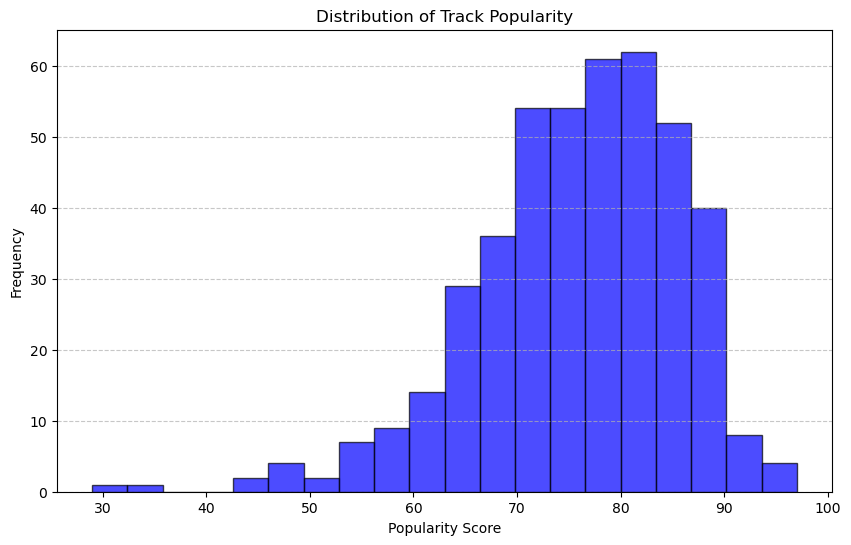

In [60]:
popularity = df['Popularity']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity , bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q.3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?

In [63]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [69]:
correlation = df['Duration (ms)'].corr(df['Popularity'])
print(f"Correlation between duration and popularity: {correlation}")

Correlation between duration and popularity: 0.04074487217075256


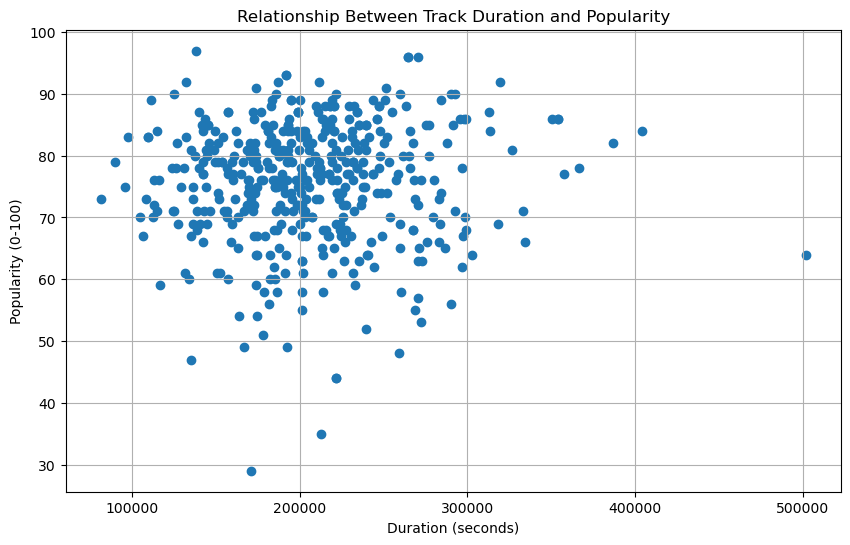

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'])
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity (0-100)')
plt.grid(True)
plt.show()

# Q.4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot ?

In [113]:
count = df['Artist'].value_counts()
count

Artist
Drake             20
Travis Scott      12
21 Savage         11
¥$                11
Lil Nas X         11
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

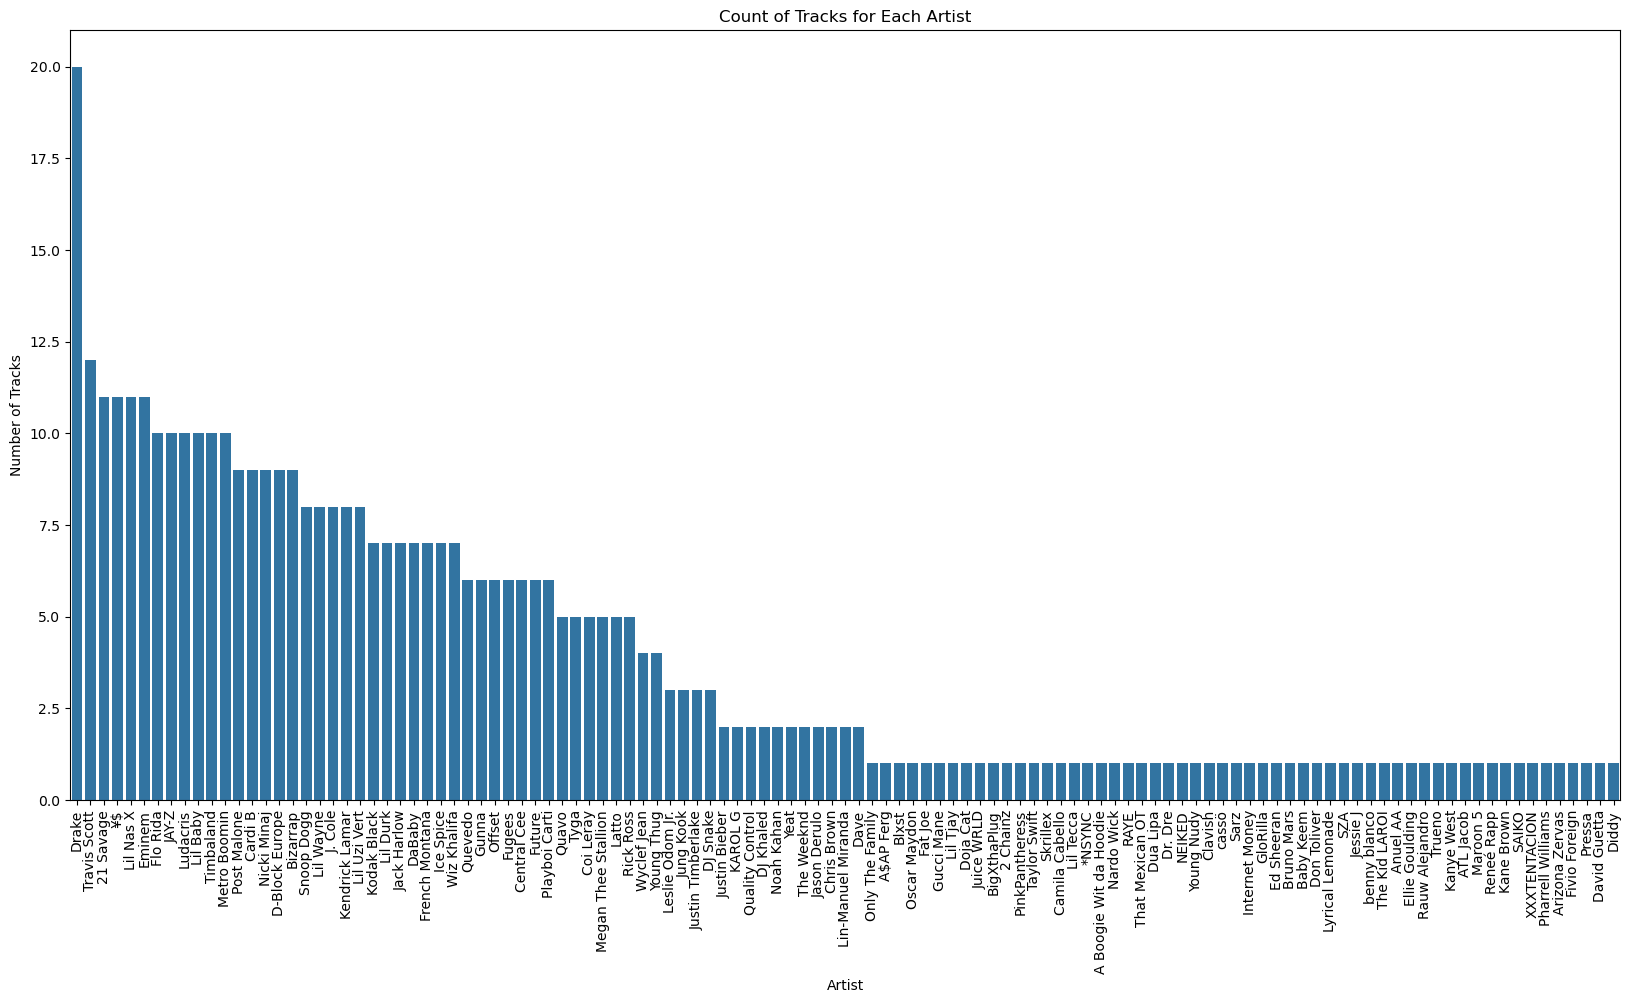

In [119]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Artist', order=count.index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

# Q.5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each .

In [124]:
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

In [132]:
print(least_popular_tracks[['Artist','Popularity']])

             Artist  Popularity
207          Pressa          29
231   Justin Bieber          35
435  French Montana          44
413  French Montana          44
225        Lil Baby          47


# Q.6Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist ?

In [137]:
popl_artist = df.groupby('Artist')['Popularity'].mean().reset_index()

In [139]:
popl_artist.head()

,Artist,Popularity
0,*NSYNC,67.000000
1,2 Chainz,72.000000
2,21 Savage,84.181818
3,A Boogie Wit da Hoodie,80.000000
4,A$AP Ferg,69.000000


In [141]:
print(popl_artist.head()[['Artist','Popularity']])

                   Artist  Popularity
0                  *NSYNC   67.000000
1                2 Chainz   72.000000
2               21 Savage   84.181818
3  A Boogie Wit da Hoodie   80.000000
4               A$AP Ferg   69.000000


In [146]:
top_artists = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5).index

In [148]:
top_artists

Index(['Drake', 'Travis Scott', '¥$', '21 Savage', 'Eminem'], dtype='object', name='Artist')

In [150]:
average_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().reset_index()

In [152]:
average_popularity

,Artist,Popularity
0,21 Savage,84.181818
1,Drake,83.500000
2,Eminem,83.636364
3,Travis Scott,87.000000
4,¥$,86.090909


In [157]:
print(average_popularity)

         Artist  Popularity
0     21 Savage   84.181818
1         Drake   83.500000
2        Eminem   83.636364
3  Travis Scott   87.000000
4            ¥$   86.090909


# Q .7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?

# Q.8 Visualize relationships between multiple numerical variables simultaneously using a pair plot ?

<Figure size 1000x800 with 0 Axes>

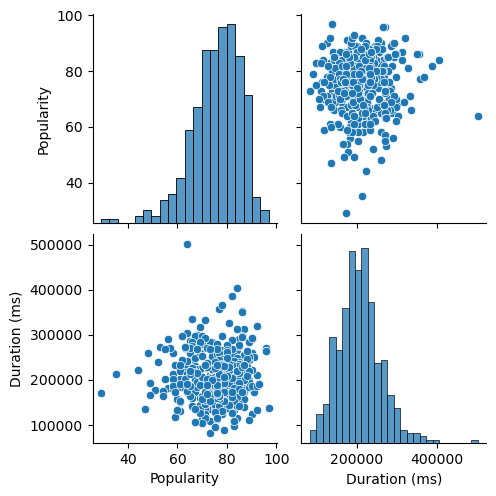

In [160]:
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.show()

# Q.9Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

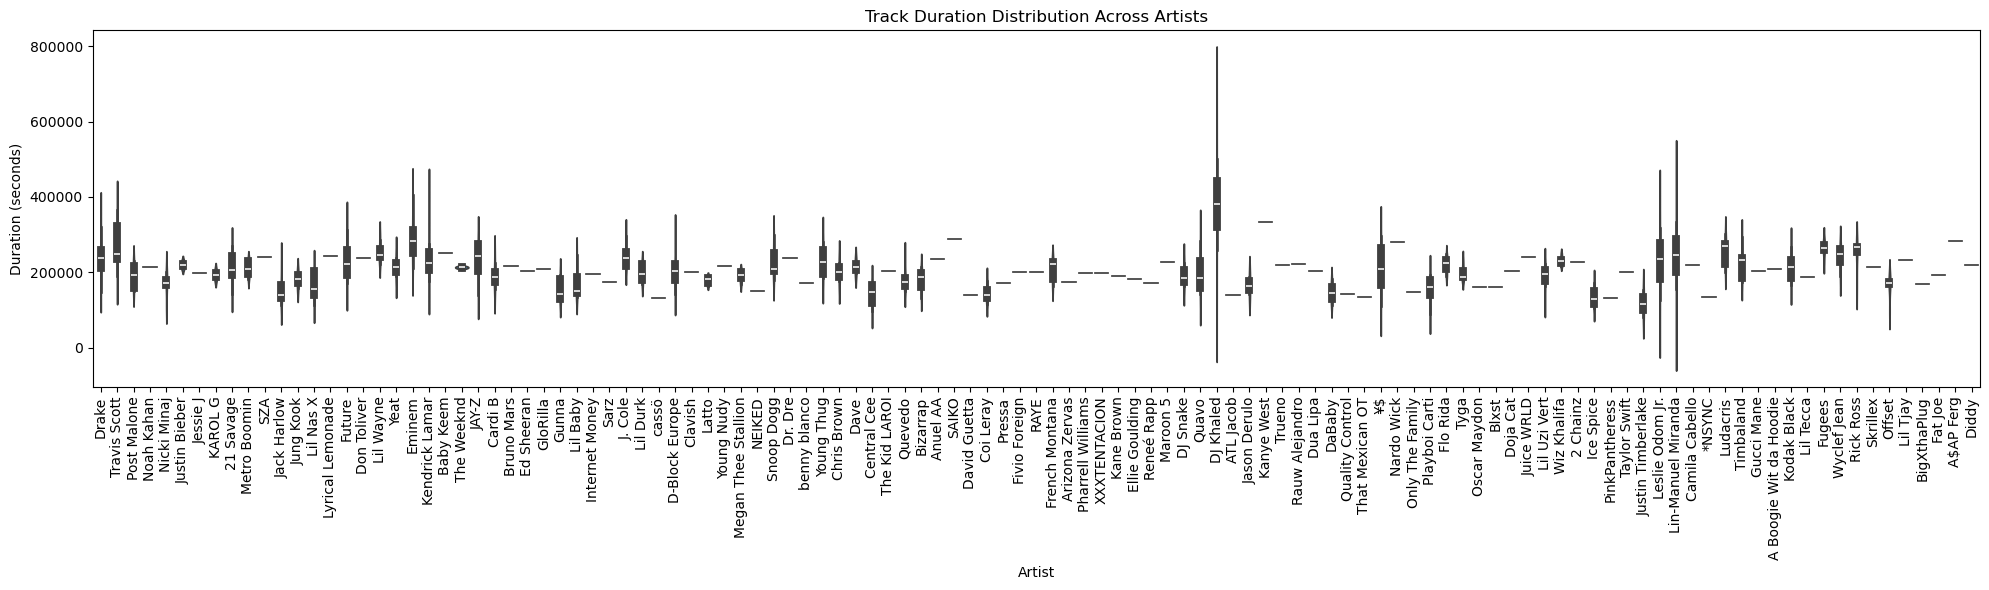

In [167]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Track Duration Distribution Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

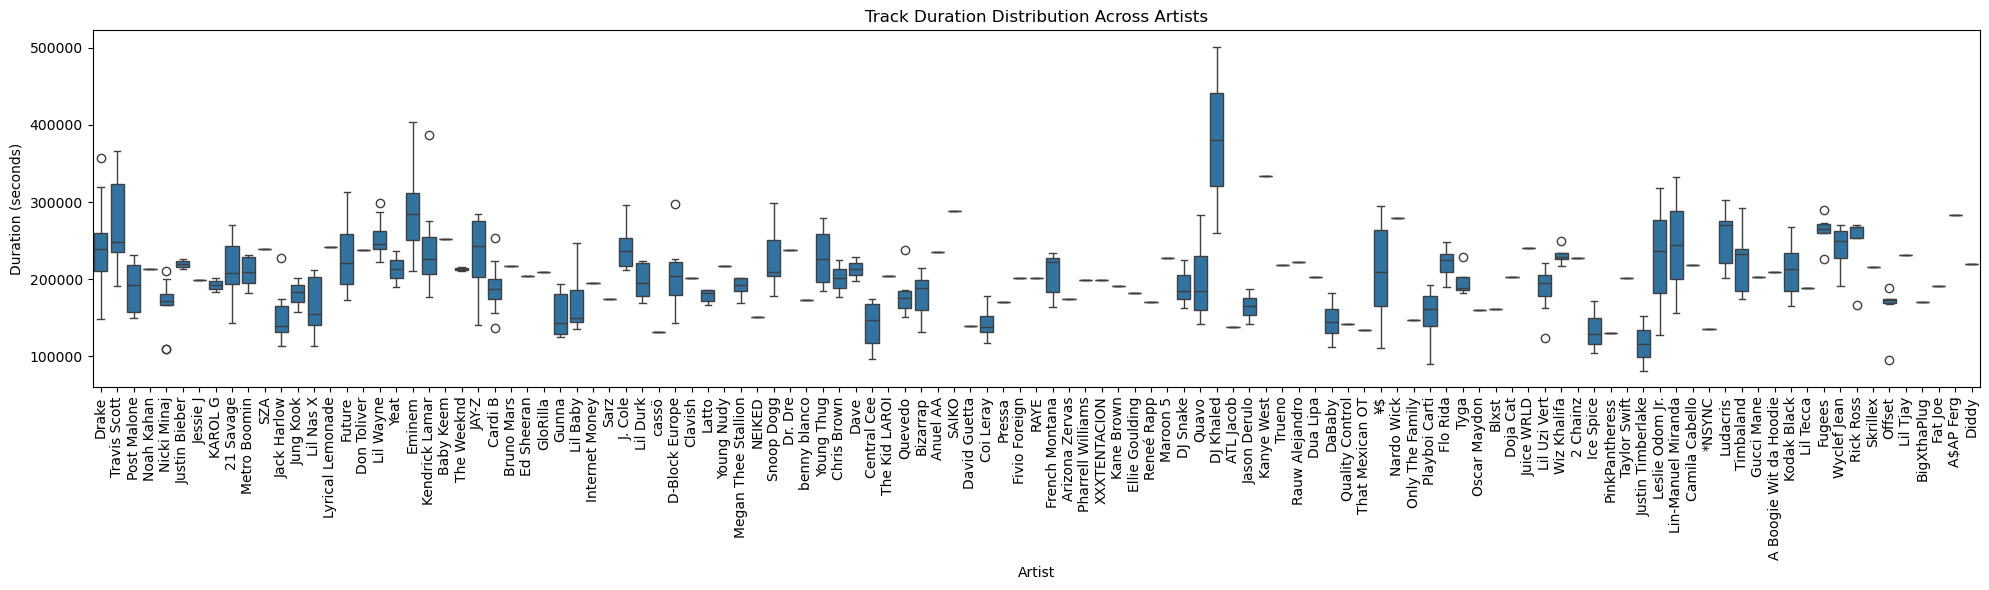

In [173]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Track Duration Distribution Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

# Q.10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

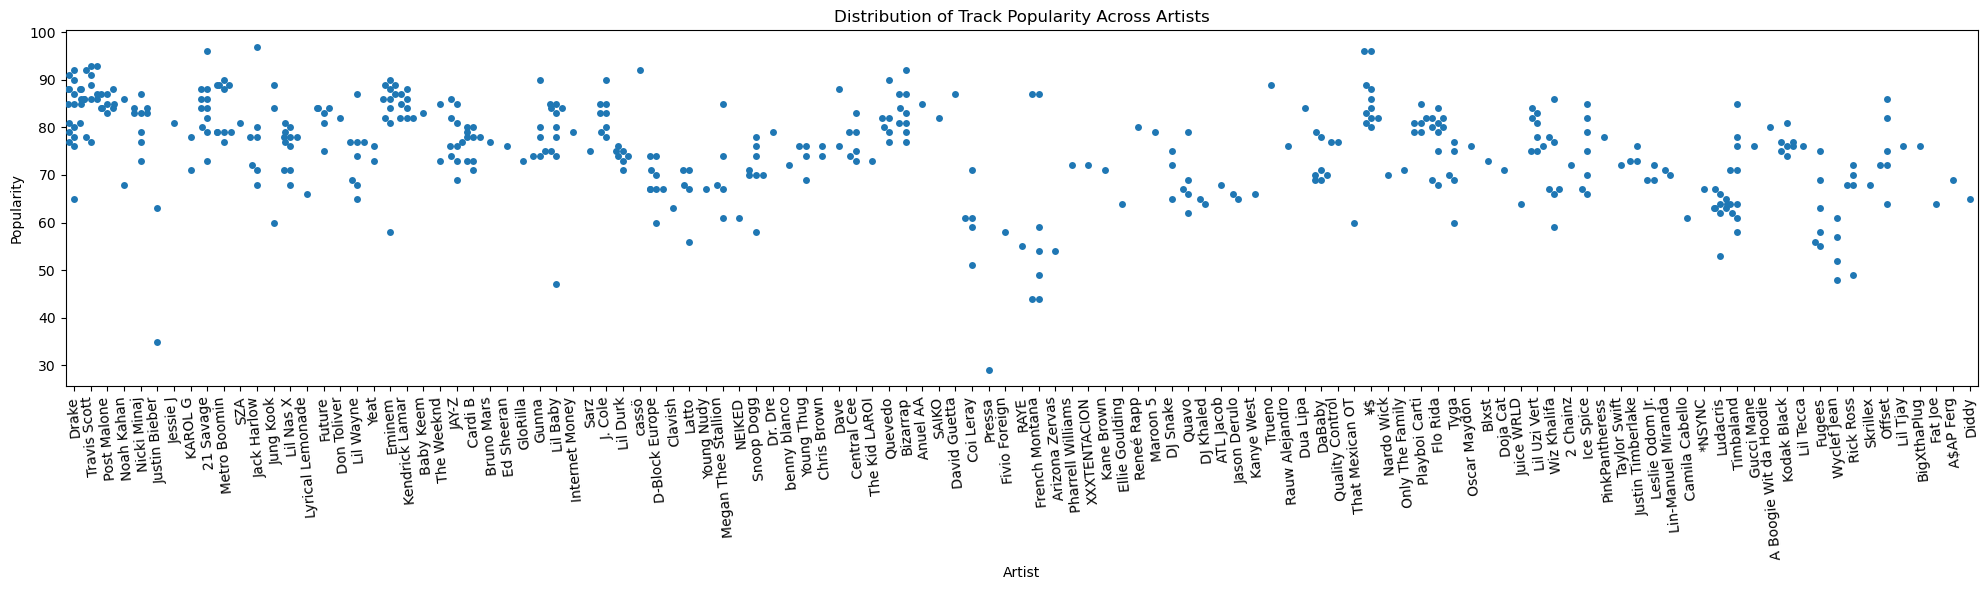

In [178]:
plt.figure(figsize=(20, 6))
sns.swarmplot(data=df, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=95)  
plt.tight_layout()
plt.show()